# Part II - (Loan Data from Prosper:)
## by (ALya)

## Investigation Overview


>  For the presentation, I focus on just the influence of the five of variable 
LoanStatus,EmploymentStatus,ProsperRating,and LoanOriginalAmount 
Afterwards ,I also look into the other variables  by use  plotting their distribution with histograms. Finally, explore  the effect of these variables on theinterplay betweenLoanStatus and LoanOriginalAmount using catplot.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Employment Status to Konw who is more have loan which is Employed full time 

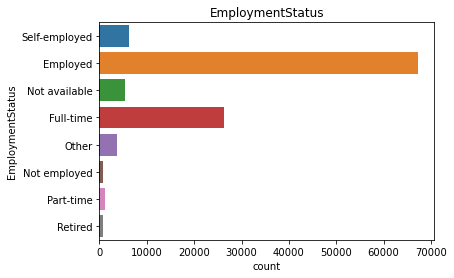

In [3]:

sb.countplot(y='EmploymentStatus', data=df)
plt.title("EmploymentStatus")
plt.xlabel("count")
plt.ylabel("EmploymentStatus")
plt.show()

## (Visualization 2)
<h4>ProsperRating (Alpha),LoanStatus and LoanOriginalAmount
<h4>that people with high Prosper ratings tend to have higher defaulted credit amounts than those with lower default rates


In [4]:
df = df[df["LoanStatus"].isin(["Completed", "Defaulted", "Chargedoff"])]
df["LoanStatus"] = df["LoanStatus"].replace("Chargedoff", "Defaulted")
df["LoanStatus"].value_counts()


Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

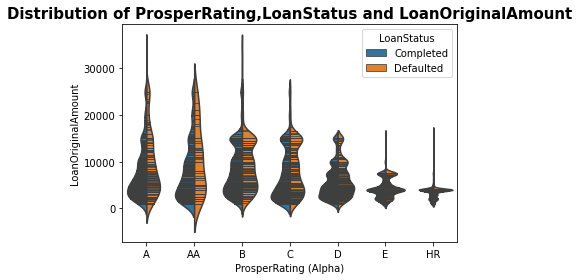

In [5]:
df = df.sort_values(by='ProsperRating (Alpha)')
sb.violinplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',split=True,inner='stick')
plt.title("Distribution of ProsperRating,LoanStatus and LoanOriginalAmount", weight = 'bold', fontsize = 15);


<h2>(Visualization 3)</h2>
<h3> CreditScoreRang</h3>
<h4> There are only a few values below 400 and above where most of the data is concentrated. The credit score range appears left skewed. Based on the distribution for those values greater than 400 only, both the upper and lower credit limits appear to follow a normal distribution.


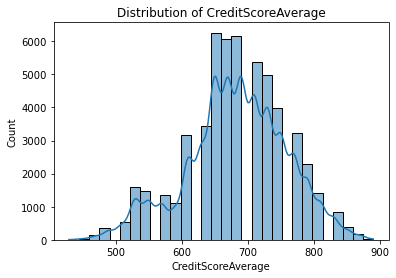

In [6]:
df['CreditScoreAverage'] = (df.CreditScoreRangeLower + df.CreditScoreRangeUpper)/2
sb.histplot(x='CreditScoreAverage', data=df[df.CreditScoreAverage>=400], bins=30, kde=True)
plt.xlabel("CreditScoreAverage")
plt.ylabel("Count")
plt.title("Distribution of CreditScoreAverage")
plt.show();

<h2>(Visualization 4)</h2>
<h3>EmploymentStatus,LoanStatus and CreditScoreAverage</h3>
<h4> full-time employees tend to complete three terms. Also, those with a Not available employment status are at highest risk of defaulting, as are most of those with credit scores below 650.

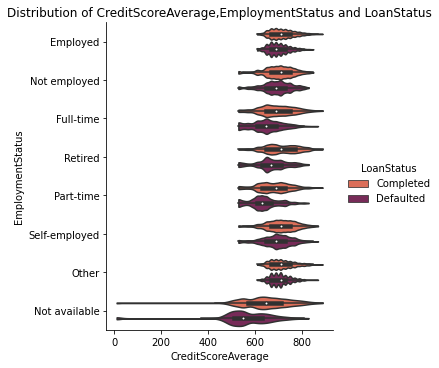

In [7]:
sb.catplot(
    data=df, x="CreditScoreAverage", y="EmploymentStatus", hue="LoanStatus",
    kind="violin", bw=.15, cut=0,split=False,palette="rocket_r",
)
plt.xlabel("CreditScoreAverage")
plt.ylabel("EmploymentStatus")
plt.title("Distribution of CreditScoreAverage,EmploymentStatus and LoanStatus")
plt.show();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 714755 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 